In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# Activity 1: Analyzing Different Scenarios and Generating the Appropriate Visualization


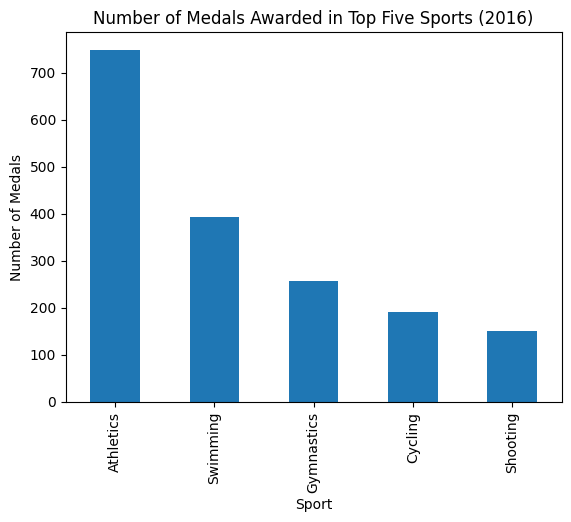

In [4]:
# Read the dataset
df = pd.read_csv('athlete_events.csv')

# Filter data for 2016
df_2016 = df[df['Year'] == 2016]

# Group by sport and count the medals
top_sports_medals = df_2016['Sport'].value_counts().head(5)

# Plot the data
top_sports_medals.plot(kind='bar')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Awarded in Top Five Sports (2016)')
plt.show()

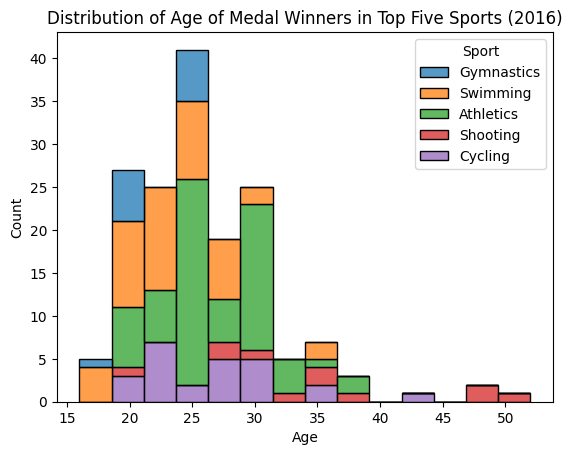

In [5]:
# Filter data for medal winners in the top five sports
top_sports = df_2016['Sport'].value_counts().head(5).index.tolist()
medal_winners_top_sports = df_2016[df_2016['Sport'].isin(top_sports) & df_2016['Medal'].notnull()]

# Plot the distribution of age
sns.histplot(data=medal_winners_top_sports, x='Age', hue='Sport', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age of Medal Winners in Top Five Sports (2016)')
plt.show()

In [6]:
# Group by national team and count the medals
top_teams_medals = df_2016[df_2016['Sport'].isin(top_sports)].groupby('Team')['Medal'].count().nlargest(5)

# Print the result
print(top_teams_medals)

Team
United States    51
Australia        15
Great Britain    14
Jamaica          12
Canada            9
Name: Medal, dtype: int64


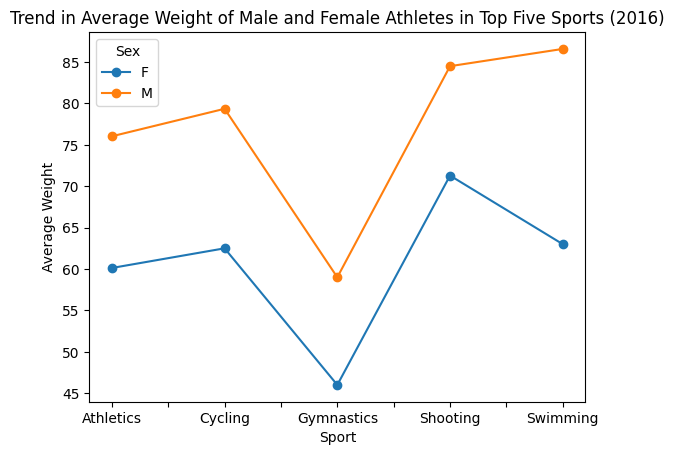

In [7]:
# Filter data for medal winners by gender and in the top five sports
medal_winners_gender_top_sports = medal_winners_top_sports.groupby(['Sport', 'Sex'], as_index=False)['Weight'].mean()

# Pivot the data to have separate columns for male and female average weights
average_weights = medal_winners_gender_top_sports.pivot(index='Sport', columns='Sex', values='Weight')

# Plot the trend
average_weights.plot(marker='o')
plt.xlabel('Sport')
plt.ylabel('Average Weight')
plt.title('Trend in Average Weight of Male and Female Athletes in Top Five Sports (2016)')
plt.legend(title='Sex')
plt.show()

In [79]:
# read the dataset as a pandas dataframe
olympics_df = pd.read_csv('athlete_events.csv')
# preview dataframe
olympics_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [80]:
# filter the dataframe to contain medal winners only (for non-winners, the Medal feature is NaN)
# note use of the inplace parameter
olympics_winners = olympics_df.dropna(subset=['Medal'])
olympics_winners.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [81]:
# print records for each value of the feature 'Sport'
olympics_winners_2016 = olympics_winners[(olympics_winners.Year == 2016)]
olympics_winners_2016.Sport.value_counts()


Athletics                66
Swimming                 46
Rowing                   39
Football                 32
Basketball               25
Cycling                  25
Water Polo               25
Rugby Sevens             23
Canoeing                 21
Hockey                   19
Volleyball               18
Handball                 18
Diving                   16
Wrestling                16
Boxing                   15
Equestrianism            15
Fencing                  15
Gymnastics               13
Sailing                  13
Judo                     12
Shooting                 11
Taekwondo                10
Weightlifting             6
Archery                   6
Badminton                 5
Beach Volleyball          4
Rhythmic Gymnastics       3
Table Tennis              3
Tennis                    2
Triathlon                 2
Modern Pentathlon         2
Synchronized Swimming     1
Trampolining              1
Golf                      1
Name: Sport, dtype: int64

In [82]:
# list the top 5 sports
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

# subset the dataframe to include data from the top sports
olympics_top_sports_winners_2016 = olympics_winners_2016[(
    olympics_winners_2016.Sport.isin(top_sports))]
olympics_top_sports_winners_2016.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


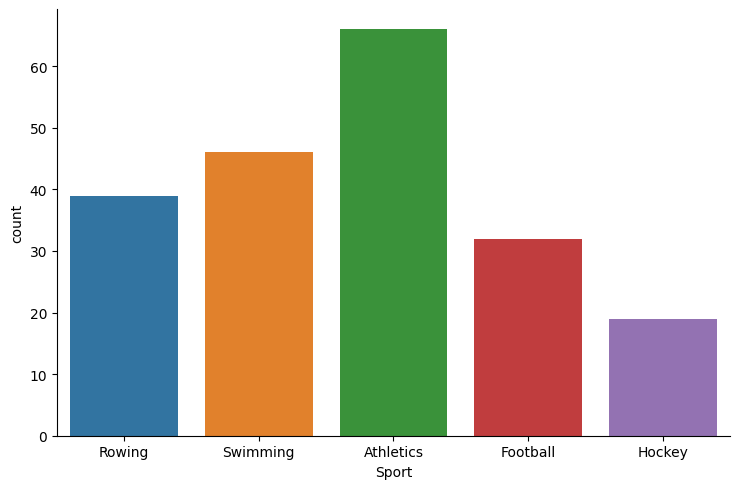

In [86]:
# generate bar plot indicating count of medals awarded in each of the top sports
g = sns.catplot(x='Sport', data=olympics_top_sports_winners_2016,
                kind="count", aspect=1.5)


<AxesSubplot:xlabel='Age', ylabel='Count'>

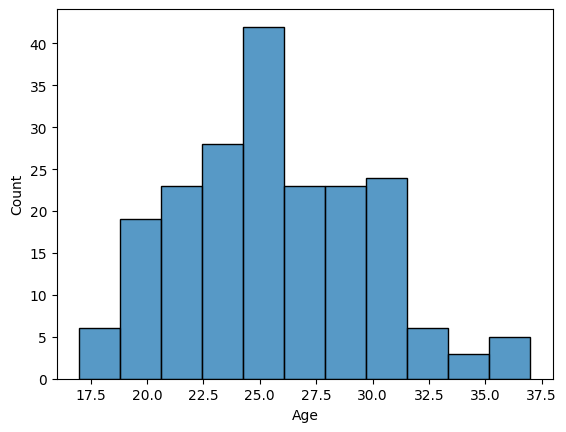

In [90]:
sns.histplot(olympics_top_sports_winners_2016.Age, kde=False)


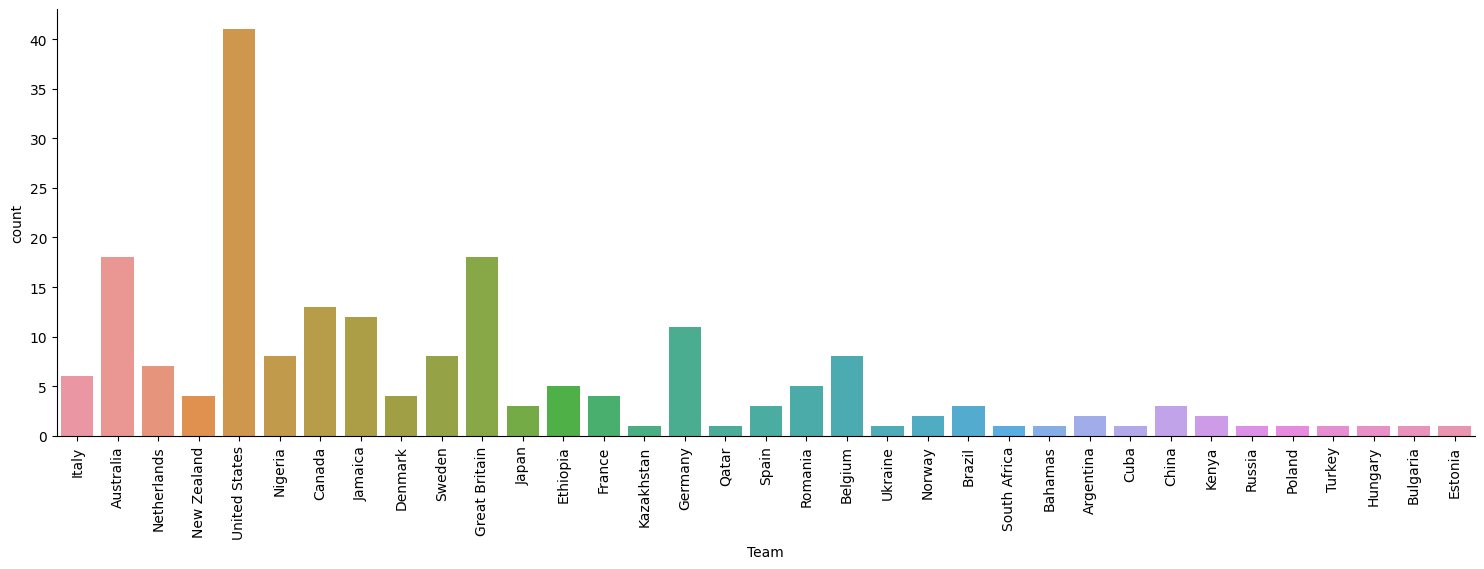

In [92]:
g = sns.catplot(x='Team', data=olympics_top_sports_winners_2016,
                kind="count", aspect=3)
g.set_xticklabels(rotation=90)


<AxesSubplot:xlabel='Sport', ylabel='Weight'>

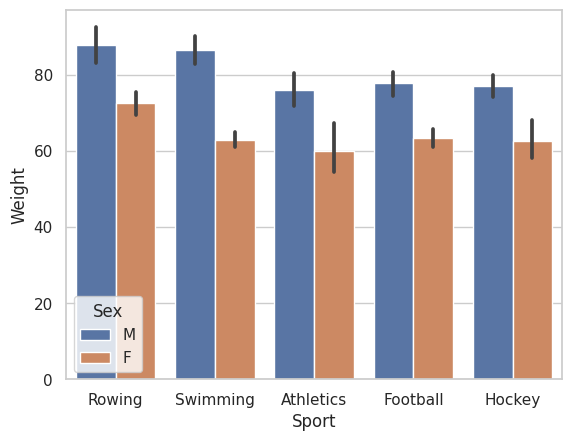

In [94]:
sns.set(style="whitegrid")
sns.barplot(x="Sport", y="Weight",
            data=olympics_top_sports_winners_2016, estimator=mean, hue='Sex')
